In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load the Student Performance Data Set
Count the Number of Rows = 25000, Check for Empty Cells - there are none


In [11]:
# Importing necessary libraries
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/DataScience102_Project/Student_Performance.csv'
# Load the dataset
data = pd.read_csv(file_path)

# Count the total number of rows in the dataset
total_rows = data.shape[0]

print(f'Total number of rows: {total_rows}\n\n')

#remove duplicate rows
data = data.drop_duplicates()
print('The total number of rows after removing duplicate rows is ', data.shape[0])



Total number of rows: 25000


The total number of rows after removing duplicate rows is  15000


###Bivariate Analysis - Correlation Matrix

Correlation Matrix:
                            age  study_hours  attendance_percentage  \
age                    1.000000     0.004240               0.004521   
study_hours            0.004240     1.000000              -0.009486   
attendance_percentage  0.004521    -0.009486               1.000000   
math_score             0.000575     0.802971               0.252210   
science_score          0.008525     0.804551               0.248960   
english_score          0.002694     0.804208               0.253859   
overall_score          0.004981     0.905885               0.288473   

                       math_score  science_score  english_score  overall_score  
age                      0.000575       0.008525       0.002694       0.004981  
study_hours              0.802971       0.804551       0.804208       0.905885  
attendance_percentage    0.252210       0.248960       0.253859       0.288473  
math_score               1.000000       0.785904       0.788176       0.885394  
scienc

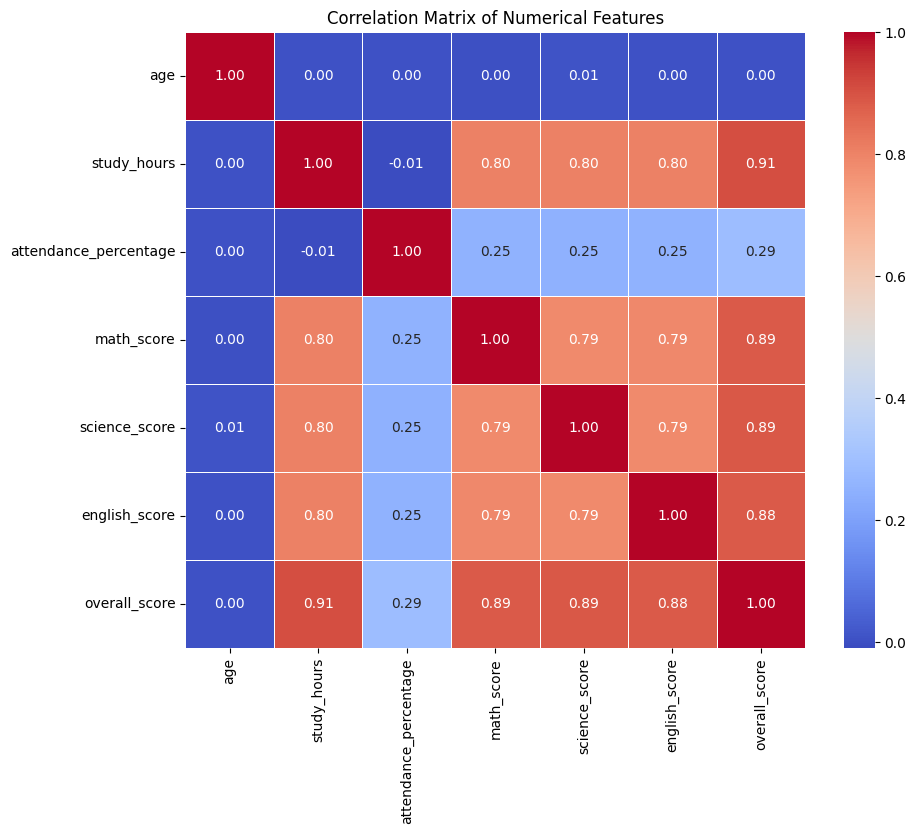

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_corr = ['age','study_hours','attendance_percentage','math_score','science_score', 'english_score','overall_score']

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols_for_corr].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Bivariate Analysis - Numberical vs. Categorical Variables (Box Plots)


--- Bivariate Analysis: Numerical vs. Categorical Variables (Box Plots) ---


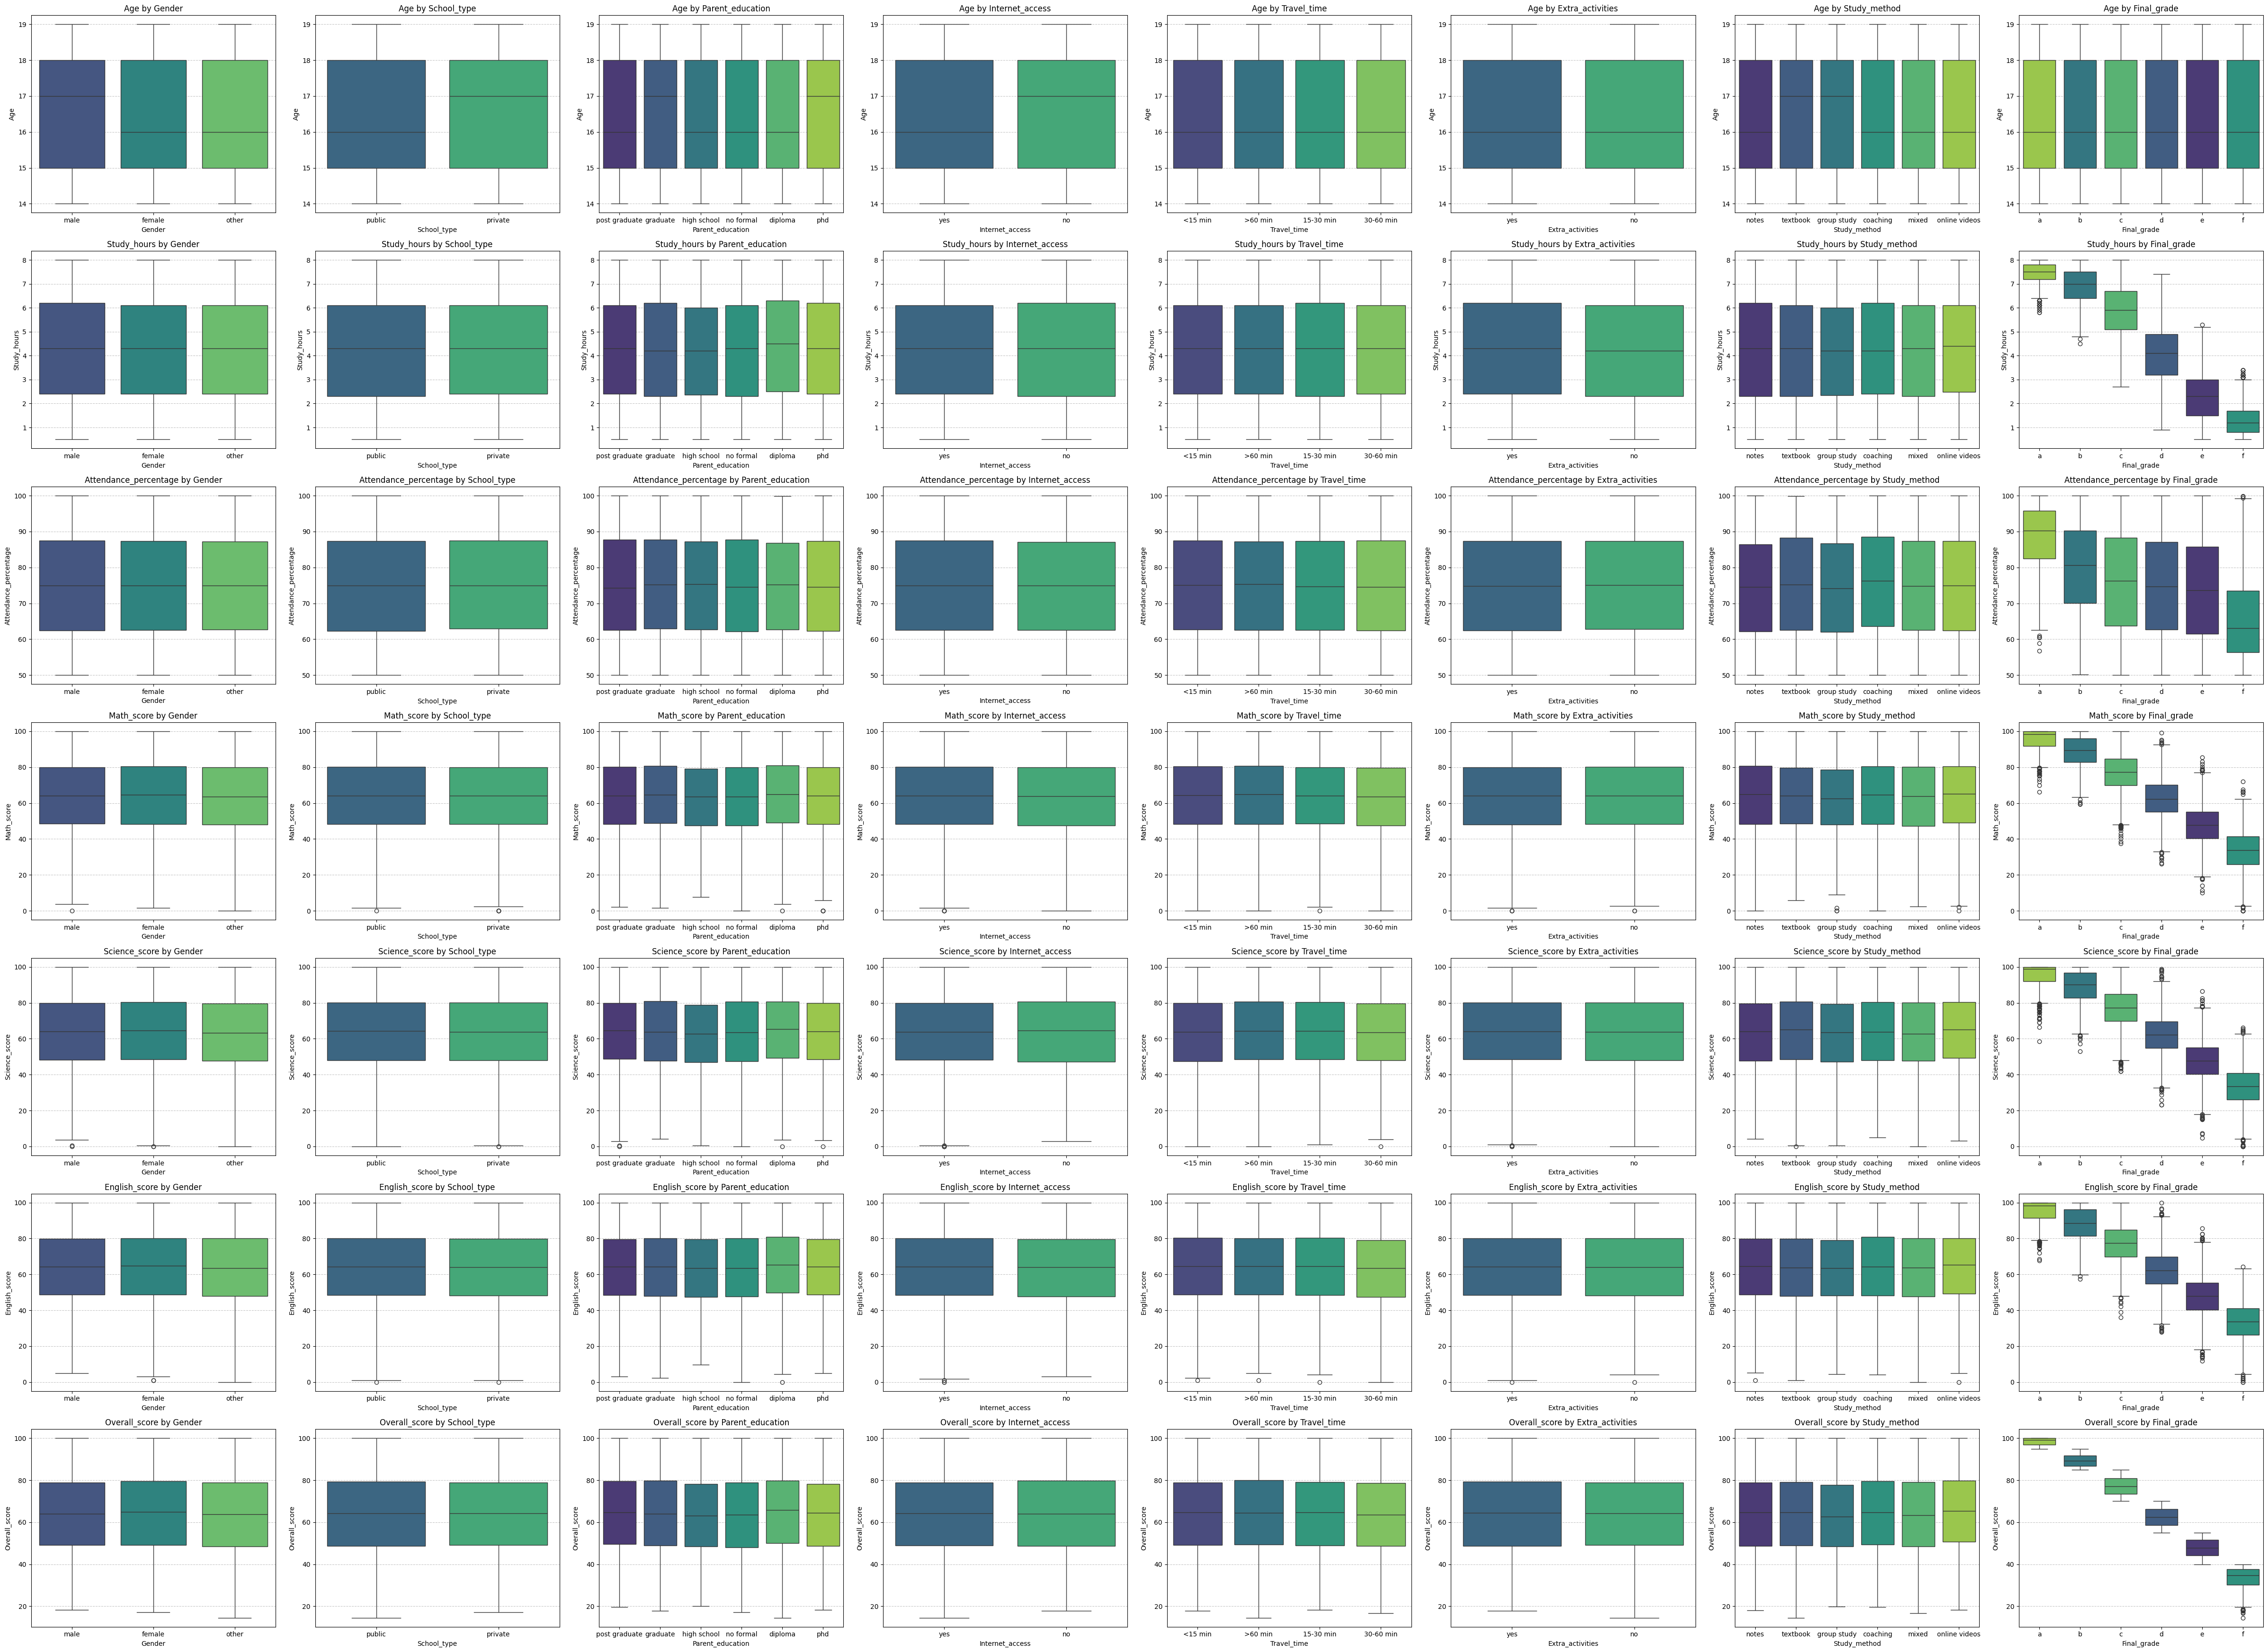

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['gender', 'school_type','parent_education','internet_access',
               'travel_time','extra_activities', 'study_method', 'final_grade']
numerical_vars= ['age','study_hours','attendance_percentage','math_score','science_score', 'english_score','overall_score']

print("\n--- Bivariate Analysis: Numerical vs. Categorical Variables (Box Plots) ---")

# Define the grid dimensions for the subplots
num_rows = len(numerical_vars)
num_cols = len(categorical_vars)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5))
axes = axes.flatten()

plot_index = 0
# Define the desired order for final grades
final_grade_order = ['a', 'b', 'c', 'd', 'e', 'f']

for num_col in numerical_vars:
    for cat_col in categorical_vars:
        ax = axes[plot_index]
        # Use the specific order for 'final_grade' if it's the current categorical column
        if cat_col == 'final_grade':
            sns.boxplot(data=data, x=cat_col, y=num_col, hue=cat_col, palette='viridis', legend=False, ax=ax, order=final_grade_order)
        else:
            sns.boxplot(data=data, x=cat_col, y=num_col, hue=cat_col, palette='viridis', legend=False, ax=ax)
        ax.set_title(f'{num_col.capitalize()} by {cat_col.capitalize()}')
        ax.set_xlabel(cat_col.capitalize())
        ax.set_ylabel(num_col.capitalize())
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plot_index += 1

plt.tight_layout()
plt.show()

###Scatterplot of Study Hours versus Overall Score

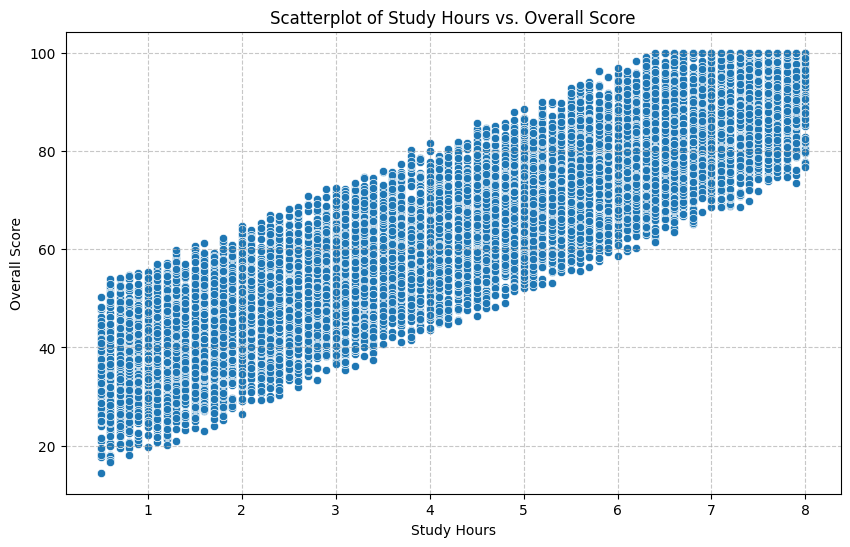

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='overall_score', data=data)
plt.title('Scatterplot of Study Hours vs. Overall Score')
plt.xlabel('Study Hours')
plt.ylabel('Overall Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Scatterplot of Atteendance Percentage versus Overall Score

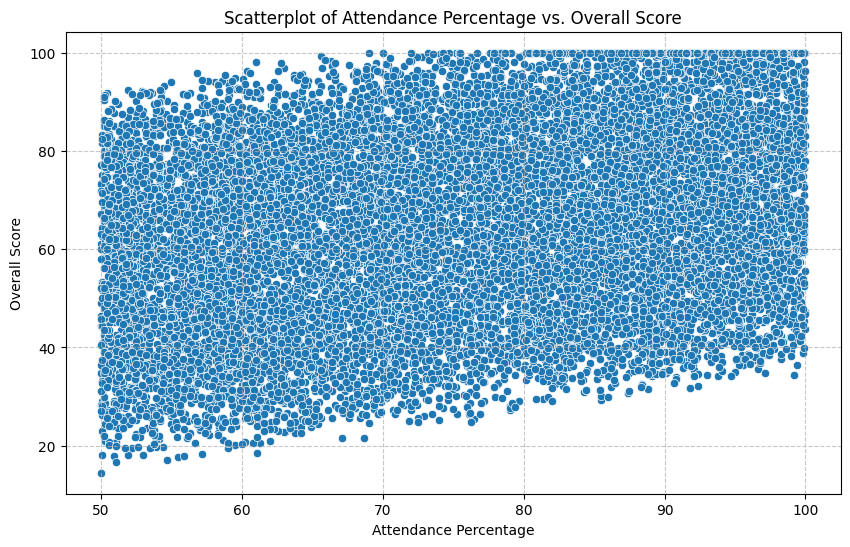

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='attendance_percentage', y='overall_score', data=data)
plt.title('Scatterplot of Attendance Percentage vs. Overall Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Overall Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts)


--- Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts - All Pairs) ---


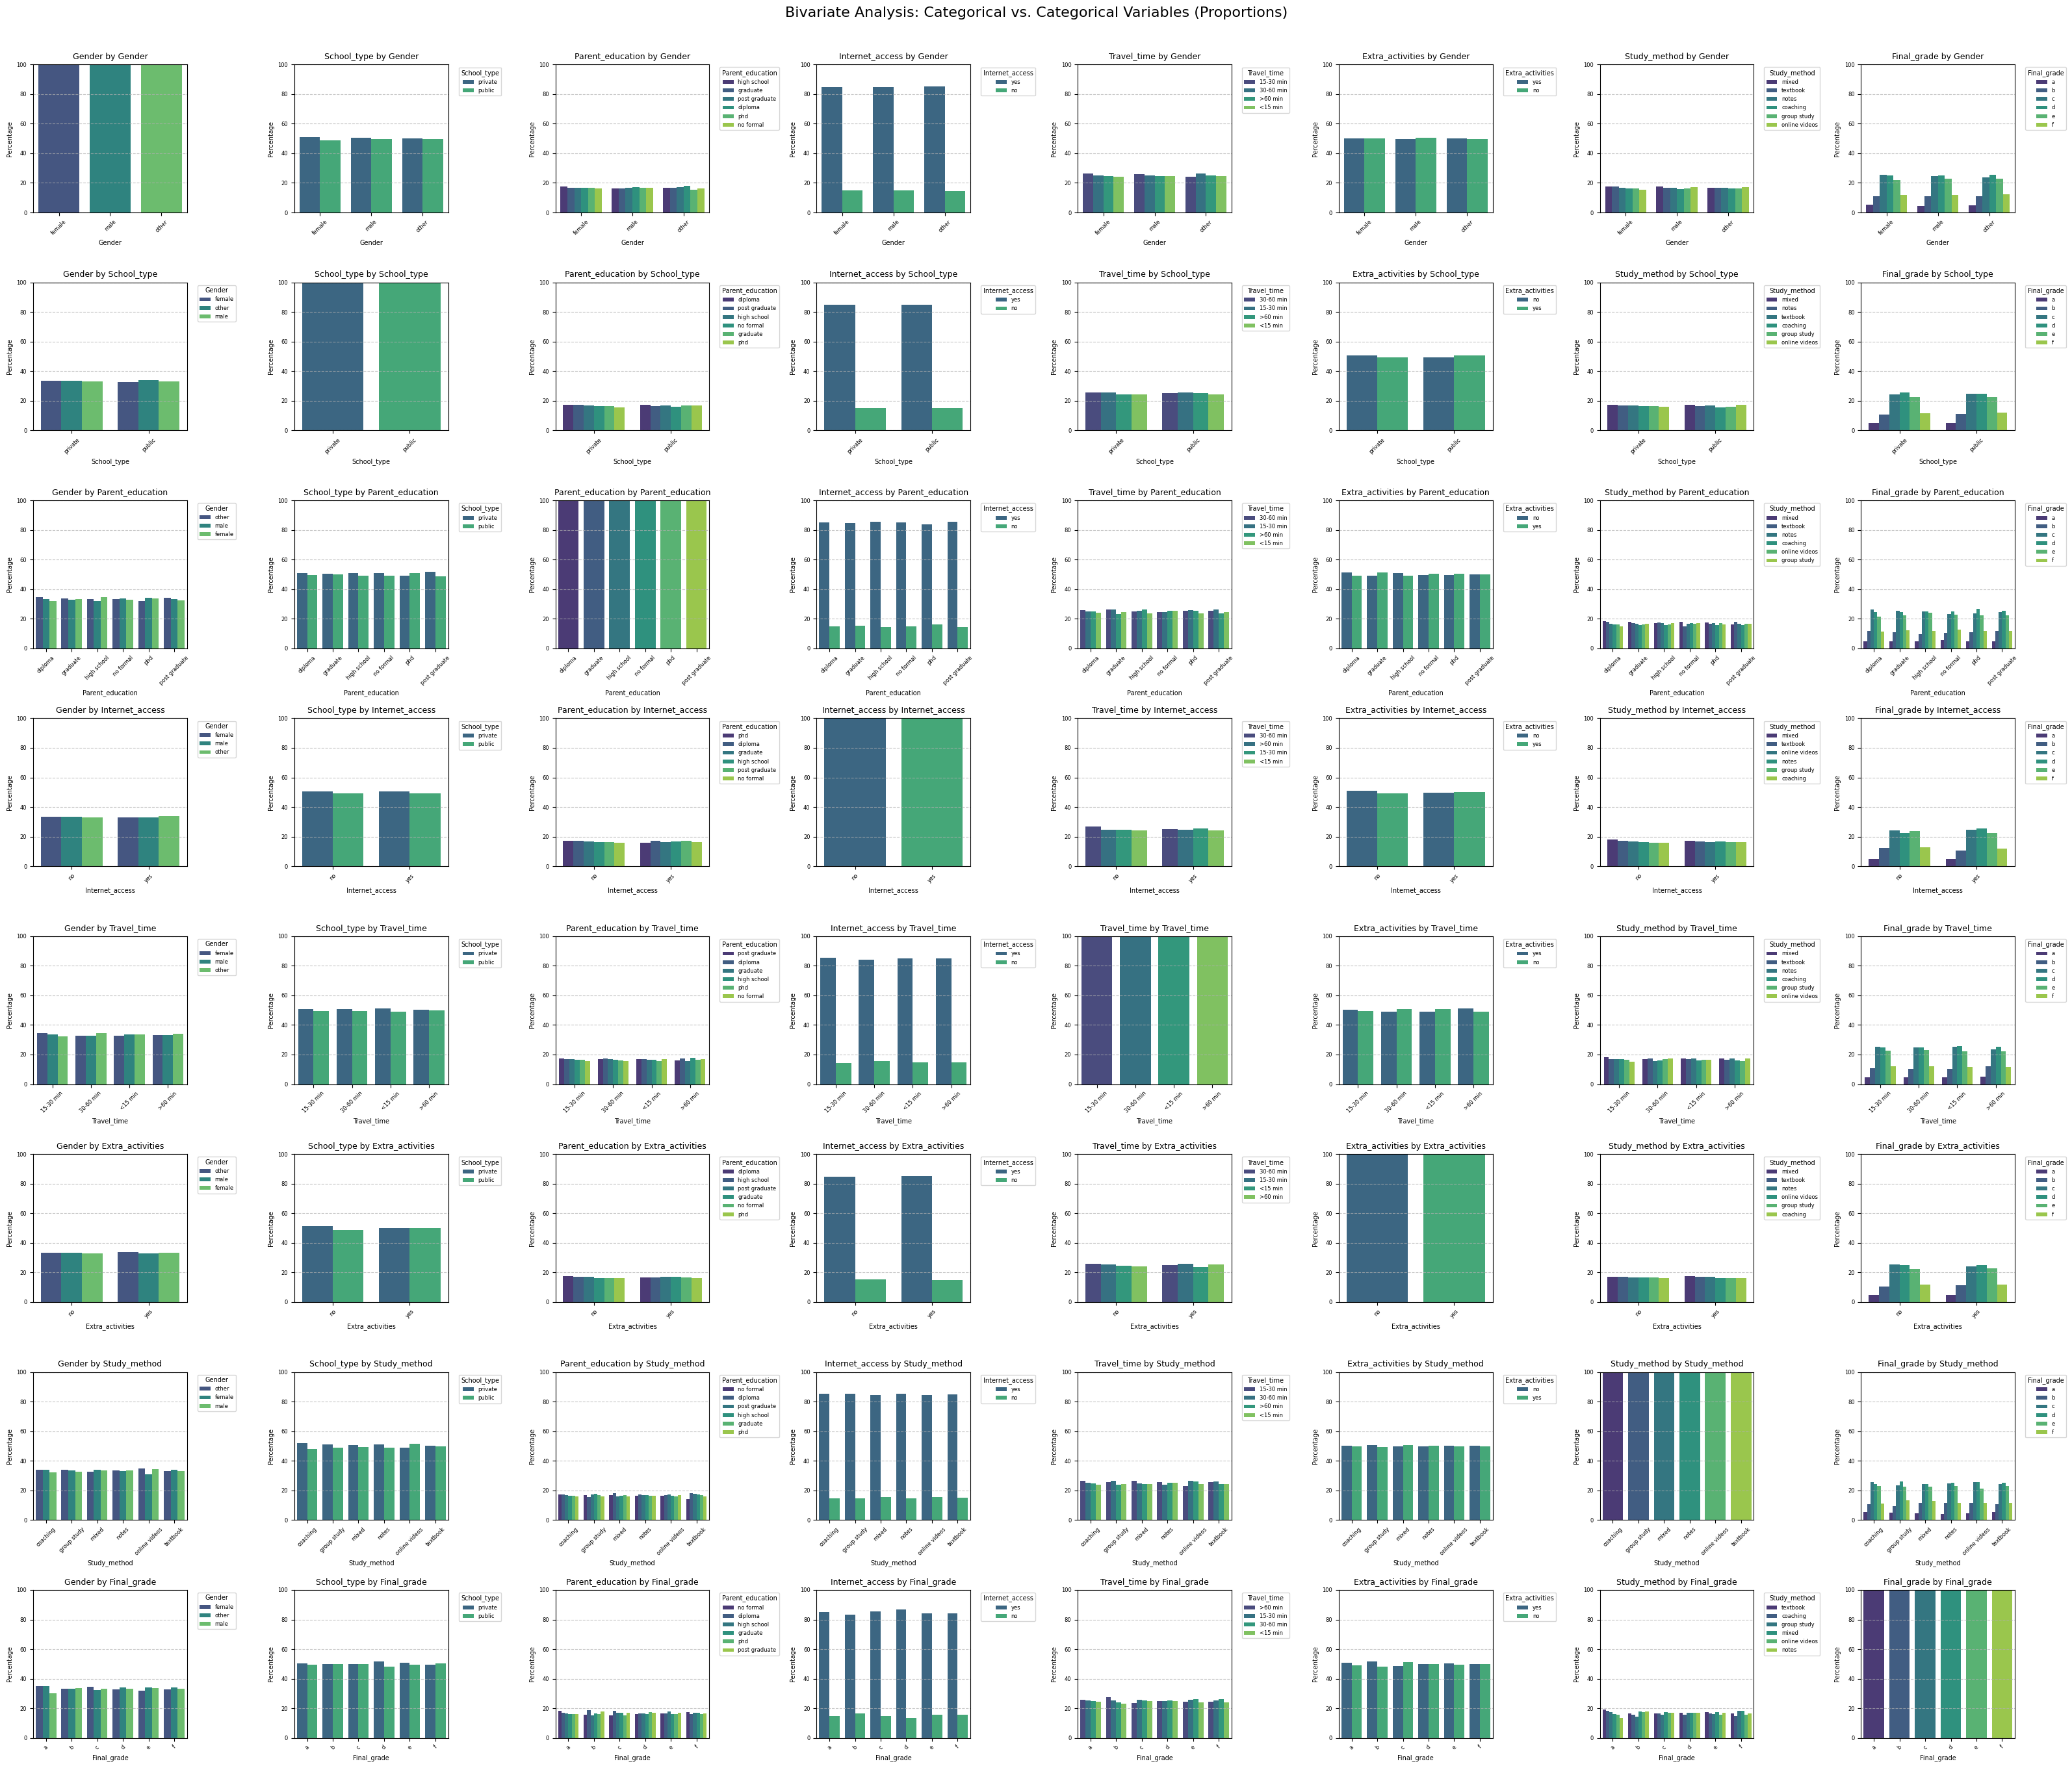

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd

# Re-define categorical_vars1 and categorical_vars2 to ensure they are available
# (assuming the previous cell wRxPGtX57xAn containing their definition would have been run)
categorical_vars1 = ['gender', 'school_type','parent_education','internet_access',
               'travel_time','extra_activities', 'study_method', 'final_grade']
categorical_vars2 = ['gender', 'school_type','parent_education','internet_access',
               'travel_time','extra_activities', 'study_method', 'final_grade']

print("\n--- Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts - All Pairs) ---")

# Generate all possible pairs from categorical_vars1 and categorical_vars2
all_categorical_pairs = list(itertools.product(categorical_vars1, categorical_vars2))

# Determine the grid dimensions for the subplots
num_plots = len(all_categorical_pairs)
num_cols_grid = 8 # Using 8 columns to match the number of variables
num_rows_grid = (num_plots + num_cols_grid - 1) // num_cols_grid # Calculate rows needed (ceiling division)

# Define final_grade_order for consistent plotting if 'final_grade' is involved
final_grade_order = ['a', 'b', 'c', 'd', 'e', 'f']

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows_grid, num_cols_grid, figsize=(num_cols_grid * 4, num_rows_grid * 3.5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (cat1, cat2) in enumerate(all_categorical_pairs):
    ax = axes[i]

    # Calculate proportions
    # Using observed=False for pandas 1.1.0+ to include all categories even if not present in a group
    proportions = data.groupby(cat1, observed=False)[cat2].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

    # Apply specific order for 'final_grade' if it's the x-axis variable
    x_order = None
    if cat1 == 'final_grade':
        x_order = final_grade_order

    # Apply specific order for 'final_grade' if it's the hue variable
    hue_order_list = None
    if cat2 == 'final_grade':
        hue_order_list = final_grade_order

    # Plot based on whether cat1 and cat2 are the same
    if cat1 != cat2:
        sns.barplot(data=proportions, x=cat1, y='percentage', hue=cat2, palette='viridis', ax=ax, order=x_order, hue_order=hue_order_list)
        ax.legend(title=cat2.capitalize(), fontsize=6, title_fontsize=7, bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position to prevent overlap
    else:
        # Fix for FutureWarning: Passing `palette` without assigning `hue` is deprecated
        sns.barplot(data=proportions, x=cat1, y='percentage', hue=cat1, palette='viridis', ax=ax, order=x_order, legend=False)

    ax.set_title(f'{cat2.capitalize()} by {cat1.capitalize()}', fontsize=9)
    ax.set_xlabel(cat1.capitalize(), fontsize=7)
    ax.set_ylabel('Percentage', fontsize=7)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45, labelsize=6)
    ax.tick_params(axis='y', labelsize=6)
    ax.set_ylim(0, 100) # Set y-limit for percentages

# Hide any unused subplots if num_plots is not a perfect square in the grid
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make space for suptitle and legends
plt.suptitle('Bivariate Analysis: Categorical vs. Categorical Variables (Proportions)', y=1.0, fontsize=16) # Overall title for the figure
plt.show()

###Summary
Overall score seemed to be correlate most with the number of study hours.  Overall score was mildly correlated to attendance. Neither study hours or attendance seemed to be correlated any of the other categorical variables.

In [ ]:
from google.colab import drive
drive.flush_and_unmount()